# Data Analysis: Self-Paced Reading Task


## Research Questions and Predictions


**Research questions**:

1. Are object relative clauses (ORs) parsed slower than subject relative clauses (SRs) by adult Spanish-English bilinguals?

2. If so, does number mismatch between the two determiner phrases (DPs) facilitate their comprehension?

**Predictions**:

1. Adult Spanish-English bilinguals will show shorter reaction times (RTs) in SRs than in ORs.

2. Number mismatch between the two DPs will result in shorter RTs in ORs than number match.


## RT Data Analysis


This is a step by step guide on how the data collected by the self-paced reading task has been analyzed.


### 1. Setting Up


#### Loading Relevant Libraries


The following libraries are imported:

1. `tidyverse`, for cleaner data wrangling functions and access to other included packages, such as `ggplot2`.
2. `ggthemes`, to access the theme `theme_calc()`.
3. `lmerTest`, for more powerful mixed regression models.
4. `gt`, for table creation functions.
5. `broom.mixed`, for converting mixed model output into data frames.
6. `IRdispplay`, for displaying tables in Jupyter Notebook.


In [442]:
library(tidyverse)
library(lmerTest)
library(ggthemes)
library(gt)
library(broom.mixed)
library(IRdisplay)


#### Global Variables


##### Colors


In [443]:
accent_color <- "#354c7c"
secondary_color <- "#354b7c2b"


##### Paths


In [444]:
tables_path <- "./images/tables/"
plots_path <- "./images/plots/"


#### Setting Up Default Plot Theme


In [445]:
theme_set(
    theme_calc(
        base_size = 12,
        base_family = "Times"
    ) +
        theme(
            plot.title = element_text(size = 12, face = "bold", margin = margin(b = 10)),
            plot.background = element_rect(linewidth = 0),
            strip.background = element_rect(fill = accent_color, color = accent_color),
            strip.text = element_text(color = "white", face = "bold"),
            axis.title.x = element_text(face = "bold", margin = margin(t = 10)),
            axis.title.y = element_text(face = "bold", margin = margin(r = 10)),
            axis.line = element_line(color = accent_color, linewidth = 1),
            axis.ticks = element_blank(),
            legend.title = element_text(face = "bold")
        )
)


### 2. Importing and Processing Data


#### Importing Questionnaire Data


In [446]:
df_part <- read.csv("./data/part_data.csv")
df_part$part_name <- NULL
df_part$part_mail <- NULL
head(df_part)


,X...part_id,part_experiment,part_age,part_lang,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_eng_exp,part_eng_pro,part_spa_exp,part_spa_pro,part_eng_onset_method,part_eng_onset_time,Status,part_date
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,22,Pilot,26 - 30,"Catalan, English, Spanish",No,No,B2 (First),< 1h,< 1h,1h - 3h,1h - 3h,> 5h,> 5h,At school,5,Accepted,
2,21,Pilot,26 - 30,"Catalan, Spanish",No,No,C2 (Proficiency),1h - 3h,1h - 3h,> 5h,> 5h,> 5h,> 5h,At school,6,Accepted,
3,20,Pilot,18 - 25,"Catalan, Spanish",No,No,B2 (First),< 1h,< 1h,< 1h,< 1h,> 5h,> 5h,At school,8,Accepted,
4,26,Practicum,18 - 25,"Catalan, Spanish",No,Yes,C1 (Advanced),> 5h,> 5h,1h - 3h,< 1h,3h - 5h,3h - 5h,At school,4,Scheduled,"May 17, 2025 10:00 (GMT+2)"
5,34,TFG,18 - 25,"Catalan, Spanish",No,No,B2 (First),1h - 3h,1h - 3h,3h - 5h,3h - 5h,3h - 5h,3h - 5h,At school,6,Scheduled,"May 7, 2025 11:00 (GMT+2)"
6,33,TFG,18 - 25,"Catalan, English, Spanish",No,Yes,C1 (Advanced),< 1h,< 1h,> 5h,3h - 5h,> 5h,> 5h,At home,0,Scheduled,"May 6, 2025 13:00 (GMT+2)"


#### Cleaning Questionnaire Data


In [447]:
df_part <- df_part %>%
    select(part_experiment, X...part_id, part_lang, part_impaired., part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro, part_eng_onset_time) %>%
    mutate(
        part_experiment = as.factor(part_experiment),
        X...part_id = as.factor(X...part_id),
        part_lang = as.factor(part_lang),
        part_impaired. = as.factor(part_impaired.),
        part_abroad = as.factor(part_abroad),
        part_certificate = as.factor(part_certificate),
        part_cat_exp = as.factor(part_cat_exp),
        part_cat_pro = as.factor(part_cat_pro),
        part_spa_exp = as.factor(part_spa_exp),
        part_spa_pro = as.factor(part_cat_pro),
        part_eng_exp = as.factor(part_eng_exp),
        part_eng_pro = as.factor(part_eng_pro)
    ) %>%
    filter(part_experiment == "TFG") %>%
    rename(part_id = X...part_id) %>%
    droplevels()

df_part$part_experiment <- NULL

head(df_part, 10)


,part_id,part_lang,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_spa_exp,part_spa_pro,part_eng_exp,part_eng_pro,part_eng_onset_time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,34,"Catalan, Spanish",No,No,B2 (First),1h - 3h,1h - 3h,3h - 5h,1h - 3h,3h - 5h,3h - 5h,6
2,33,"Catalan, English, Spanish",No,Yes,C1 (Advanced),< 1h,< 1h,> 5h,< 1h,> 5h,3h - 5h,0
3,32,"Catalan, Spanish",No,No,C1 (Advanced),> 5h,> 5h,3h - 5h,> 5h,1h - 3h,1h - 3h,6
4,31,"Catalan, Spanish",No,No,C1 (Advanced),1h - 3h,> 5h,3h - 5h,> 5h,1h - 3h,< 1h,10
5,29,Spanish,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6


#### Importing Task Data


First, an example is imported to inspect the data set's variables and their data types.


In [448]:
df_example <- read.csv("./data/32.csv")
head(df_example, 10)


,rt,response,trial_type,trial_index,plugin_version,time_elapsed,part_id,task,item_number,item_type,segment,clause_type,number,stimulus,question,correct_answer,part_answer,correct
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2322825,"{""part_id"":""32""}",survey-html-form,0,2.0.0,2325458,32,,,,,,,,,,,NA
2,1536,,html-keyboard-response,2,2.0.0,2368979,32,item,null,pr_item,s0,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | _______ | ____</p>",,,,NA
3,1222,,html-keyboard-response,3,2.0.0,2370201,32,item,null,pr_item,s1,sr,ss,"<p class=""trial-stimulus"">The cat | ____ | _______ | _______ | ____</p>",,,,NA
4,1408,,html-keyboard-response,4,2.0.0,2371610,32,item,null,pr_item,s2,sr,ss,"<p class=""trial-stimulus"">_______ | that | _______ | _______ | ____</p>",,,,NA
5,1249,,html-keyboard-response,5,2.0.0,2372859,32,item,null,pr_item,s3,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | watches | _______ | ____</p>",,,,NA
6,1102,,html-keyboard-response,6,2.0.0,2373964,32,item,null,pr_item,s4,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | the dog | ____</p>",,,,NA
7,2405,,html-keyboard-response,7,2.0.0,2376370,32,item,null,pr_item,s5,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | _______ | eats</p>",false,,,NA
8,1727,,html-keyboard-response,9,2.0.0,2378602,32,item,null,pr_item,s0,or,ss,"<p class=""trial-stimulus"">_________ | ____ | _________ | _____ | ______</p>",,,,NA
9,1111,,html-keyboard-response,10,2.0.0,2379714,32,item,null,pr_item,s1,or,ss,"<p class=""trial-stimulus"">The horse | ____ | _________ | _____ | ______</p>",,,,NA


Having done this, now we know which are the specific names of each variable, which ones are of interest and the data type of their values.

We can now proceed to creating the full data set will all our participants' data. This is done by importing them and passing them through the `reduce()` function, which combines all the CSV files into a single data set. The keyword `rbind` makes sure that the individual data sets are merged as additional rows.

Note that only the following columns are selected:

- `part_id`, for the participants' ID number.
- `task`, for the kind of trial, item or question.
- `item_number`, for the items' ID number.
- `item_type`, for the type of item, experimental, practice or filler.
- `clause_type`, for the type fo clause, OR or SR.
- `number`, for the number condition, singular-singular (SS), plural-plural (PP), singular-plural (SP) or plural-singular (PS).
- `segment`, for the segment ID.
- `rt`, for the RTs.
- `correct`, for the accuracy of their responses to question tasks.


In [449]:
df_raw <- reduce(
    list(
        select(read.csv("./data/29.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/31.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/32.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct)
    ),
    rbind
)
head(df_raw, 10)


,part_id,task,item_number,item_type,clause_type,number,segment,rt,correct
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,29,,,,,,,2413859,NA
2,29,item,null,pr_item,sr,ss,s0,2521,NA
3,29,item,null,pr_item,sr,ss,s1,405,NA
4,29,item,null,pr_item,sr,ss,s2,368,NA
5,29,item,null,pr_item,sr,ss,s3,350,NA
6,29,item,null,pr_item,sr,ss,s4,382,NA
7,29,item,null,pr_item,sr,ss,s5,376,NA
8,29,item,null,pr_item,or,ss,s0,1004,NA
9,29,item,null,pr_item,or,ss,s1,414,NA


#### Cleaning Task Data


After that, the data is cleaned.

Firstly, the rows are ordered by the participants' ID number with the `order()` function.

Secondly, the observations are filtered using the `filter()` function, keeping only those that involve experimental items and excluding question tasks.

Then, the function `mutate()` is used to transform the data types. `item_number` is transformed to numeric. The rest are transformed to factors.

Additionally, a new column `matching` is created which groups match and mismatch conditions.

Lastly, the `relocate()` function is used to make the `matching` column follow the `number` one.


In [450]:
df_clean <- df_raw %>%
    .[order(.$part_id), ] %>%
    filter(.$item_type == "exp_item" & .$task == "item" & segment != "s0") %>%
    mutate(
        item_number = as.numeric(item_number),
        task = as.factor(task),
        item_type = as.factor(item_type),
        clause_type = factor(clause_type, levels = c("sr", "or"), labels = c("SR", "OR")),
        number = factor(number, levels = c("ss", "pp", "sp", "ps"), labels = c("SS", "PP", "SP", "PS")),
        matching = factor(ifelse(number == "SS" | number == "PP", "match", "mismatch"), labels = c("Match", "Mismatch")),
        segment = factor(segment, labels = c("S1", "S2", "S3", "S4", "S5")),
        part_id = as.factor(part_id),
    ) %>%
    relocate(matching, .after = number) %>%
    droplevels()

summary(df_clean)
head(df_clean, 10)


 part_id    task      item_number      item_type   clause_type number  
 29:160   item:480   Min.   :1.00   exp_item:480   SR:240      SS:120  
 31:160              1st Qu.:3.25                  OR:240      PP:120  
 32:160              Median :5.50                              SP:120  
                     Mean   :5.00                              PS:120  
                     3rd Qu.:7.25                                      
                     Max.   :8.00                                      
                                                                       
     matching   segment       rt            correct   
 Match   :240   S1:96   Min.   : 215.0   Min.   : NA  
 Mismatch:240   S2:96   1st Qu.: 611.8   1st Qu.: NA  
                S3:96   Median : 883.0   Median : NA  
                S4:96   Mean   :1134.4   Mean   :NaN  
                S5:96   3rd Qu.:1296.0   3rd Qu.: NA  
                        Max.   :6609.0   Max.   : NA  
                                       

,part_id,task,item_number,item_type,clause_type,number,matching,segment,rt,correct
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,29,item,8,exp_item,OR,PP,Match,S1,719,NA
2,29,item,8,exp_item,OR,PP,Match,S2,548,NA
3,29,item,8,exp_item,OR,PP,Match,S3,800,NA
4,29,item,8,exp_item,OR,PP,Match,S4,1176,NA
5,29,item,8,exp_item,OR,PP,Match,S5,1303,NA
6,29,item,4,exp_item,OR,SP,Mismatch,S1,688,NA
7,29,item,4,exp_item,OR,SP,Mismatch,S2,607,NA
8,29,item,4,exp_item,OR,SP,Mismatch,S3,1071,NA
9,29,item,4,exp_item,OR,SP,Mismatch,S4,1832,NA


#### Normalizing


With the data looking like it should, now it is time to check for normal distribution. A plot is created that holds the data as it is.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


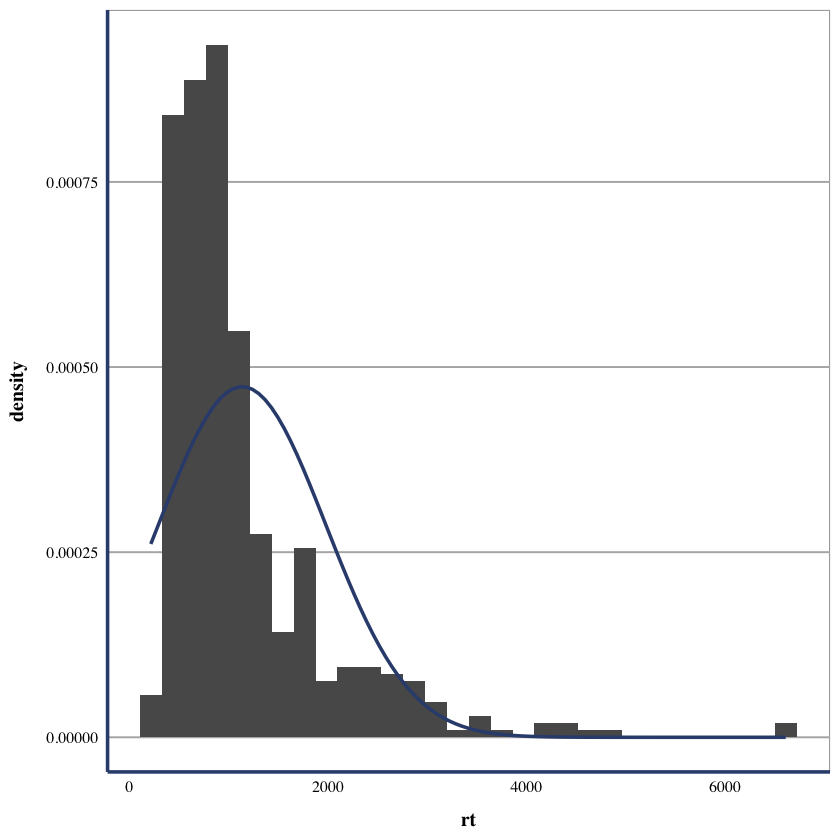

In [451]:
skewed_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
skewed_plot


The first strategy to normalize the data is removing extreme values, or outliers, which might be causing the data to be left-skewed.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


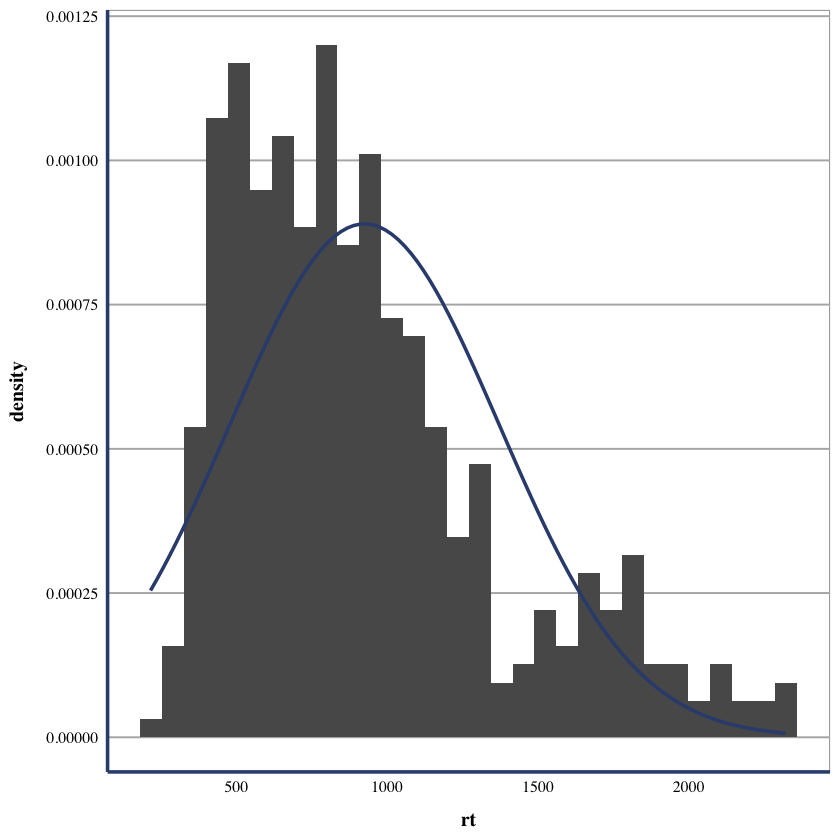

In [452]:
q1 <- quantile(df_clean$rt, 0.25)
q3 <- quantile(df_clean$rt, 0.75)
iqr <- q3 - q1
lower_limit <- q1 - iqr * 1.5
upper_limit <- q3 + iqr * 1.5

df_clean <- df_clean %>%
    filter(.$rt > lower_limit & .$rt < upper_limit)

no_outlier_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
no_outlier_plot


A second strategy that can be performed to further normalize the data is converting the continuos variable, RTs, into a logarithmic scale.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


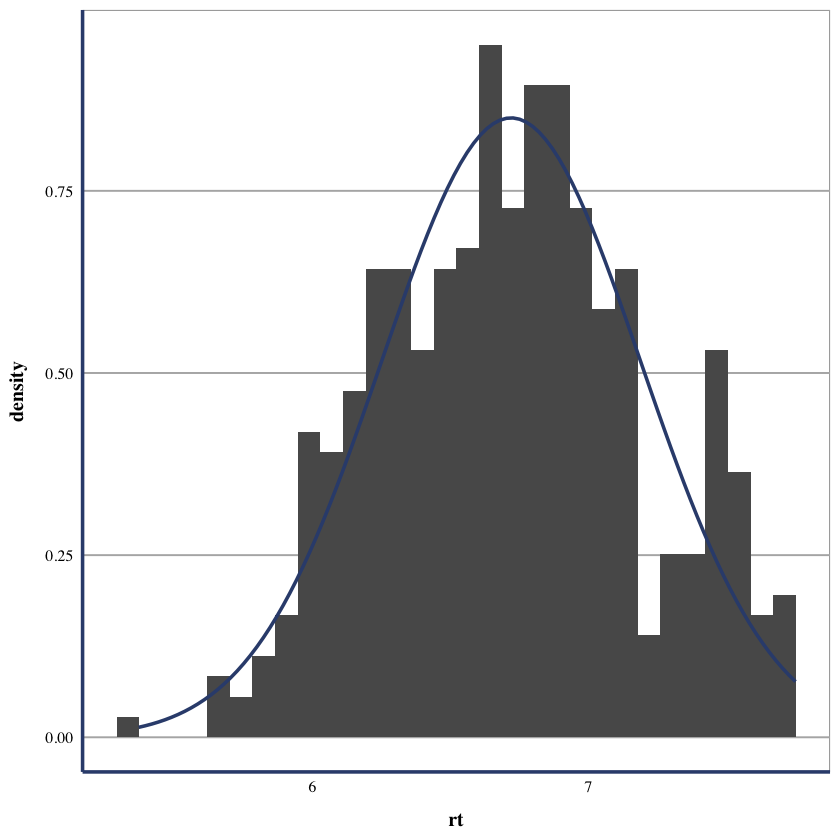

In [453]:
df_clean <- df_clean %>%
    mutate(rt = log(rt))

normal_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
normal_plot


Checking normality.



	Shapiro-Wilk normality test

data:  df_clean$rt
W = 0.99009, p-value = 0.004922


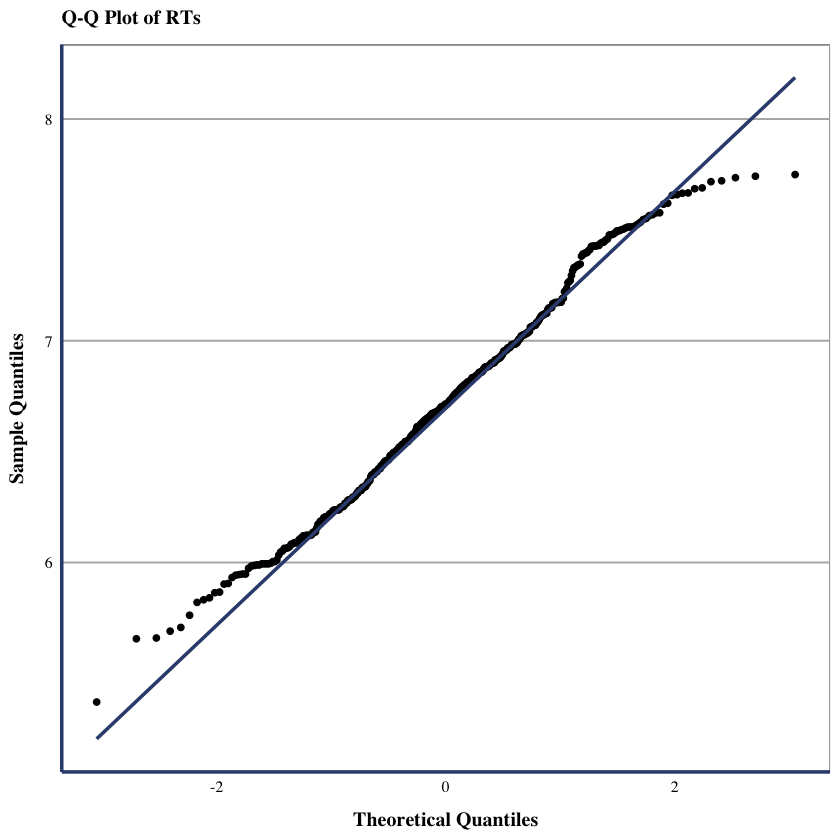

In [454]:
shapiro.test(df_clean$rt)

qq_plot <- df_clean %>%
    ggplot(aes(sample = rt)) +
    stat_qq() +
    stat_qq_line(color = accent_color, linewidth = 1) +
    labs(title = "Q-Q Plot of RTs", x = "Theoretical Quantiles", y = "Sample Quantiles")
qq_plot


#### Merging Experiment and Participant Data Sets


In [455]:
df_part$part_experiment <- NULL

df_merged <- merge(df_clean, df_part, by = "part_id")
head(df_merged, 10)


,part_id,task,item_number,item_type,clause_type,number,matching,segment,rt,correct,...,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_spa_exp,part_spa_pro,part_eng_exp,part_eng_pro,part_eng_onset_time
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,29,item,8,exp_item,OR,PP,Match,S1,6.577861,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
2,29,item,8,exp_item,OR,PP,Match,S2,6.306275,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
3,29,item,8,exp_item,OR,PP,Match,S3,6.684612,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
4,29,item,8,exp_item,OR,PP,Match,S4,7.069874,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
5,29,item,8,exp_item,OR,PP,Match,S5,7.172425,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
6,29,item,4,exp_item,OR,SP,Mismatch,S1,6.533789,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
7,29,item,4,exp_item,OR,SP,Mismatch,S2,6.408529,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
8,29,item,4,exp_item,OR,SP,Mismatch,S3,6.976348,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
9,29,item,4,exp_item,OR,SP,Mismatch,S4,7.513164,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6


### 3. RQ1: Clause Type Effects


Three regression models are created using the `lmer()` function.

- `lm_clause` checks for the correlation between RTs and clause type. Significantly higher RTs are expected for ORs.
- `lm_matching` checks for the interaction between clause type and matching on RTs. A significant effect of mismatch condition is expected in ORs but not in SRs.
- `lm_segment` checks for the interaction between clause type and segment on RTs. A significant effect of clause type is expected in segments 3, 4 and 5. The rest are filtered out.


#### Regression Model


In [456]:
lm_clause <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp))
summary(lm_clause)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp)
   Data: .

REML criterion at convergence: 179.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.16262 -0.73915 -0.01662  0.75587  2.57778 

Random effects:
 Groups       Name        Variance Std.Dev.
 part_eng_pro (Intercept) 0.00000  0.0000  
 part_eng_exp (Intercept) 0.05271  0.2296  
 Residual                 0.16124  0.4015  
Number of obs: 167, groups:  part_eng_pro, 2; part_eng_exp, 2

Fixed effects:
              Estimate Std. Error       df t value Pr(>|t|)   
(Intercept)     6.7800     0.1680   1.0599  40.352  0.01280 * 
clause_typeOR   0.1737     0.0624 164.0029   2.783  0.00601 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
claus_typOR -0.170
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingu

#### Table


In [457]:
lm_clause_tidy <- lm_clause %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ "> 0.05",
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR (Intercept)",
            term == "clause_typeOR" ~ "OR"
        ),
        code = case_when(
            p.value == "< 0.001" ~ "***",
            p.value == "< 0.01" ~ "**",
            p.value == "< 0.05" ~ "*",
            p.value == "> 0.05" ~ " "
        )
    )

lm_clause_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR (Intercept),6.7799488,0.16802187,40.351585,1.059906,< 0.05,*
fixed,NA,OR,0.1736936,0.06240373,2.783385,164.002895,< 0.01,**


In [467]:
lm_clause_table <- lm_clause_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 565,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.padding = 10,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        heading.border.bottom.color = accent_color,
        column_labels.font.weight = "bold",
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**Mixed Model Results: Clause Type**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Estimate",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

display_html(as_raw_html(lm_clause_table))
gtsave(lm_clause_table, filename = "clause_type_table.png", path = tables_path)


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: Times; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 12px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: 565px; border-top-style: solid; border-top-width: 0px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" width="565" bgcolor="#FFFFFF">
 
 
 <td colspan="6" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 12px; padding-top: 10px; padding-bottom: 10px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #354C7C; font-weight: normal;" bgcolor="#FFFFFF" align="center"> Mixed Model Results: Clause Type 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="term" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#354C7C" valign="bottom" align="left">Condition 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="estimate" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Estimate 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="std.error" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Std. Error 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="statistic" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right"> t -value 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="p.value" style="border-style

file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//RtmpiIspwT/file2ee02c859247.html screenshot completed



#### Plots


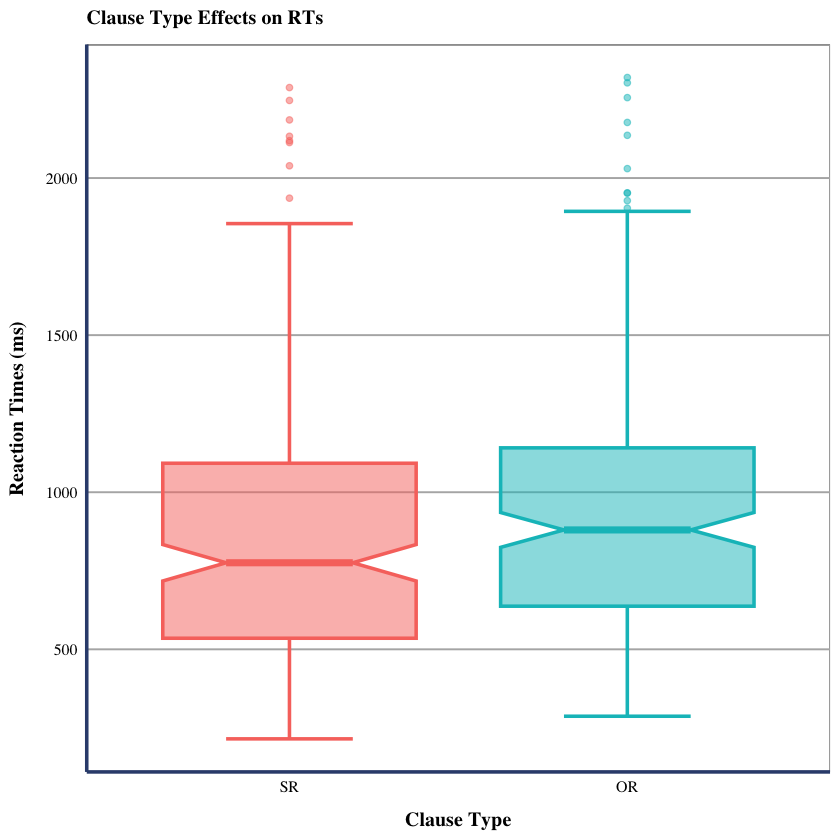

In [459]:
lm_clause_plot <- df_merged %>%
    ggplot(aes(y = exp(rt), x = clause_type, color = clause_type, fill = clause_type)) +
    geom_boxplot(show.legend = FALSE, staplewidth = 0.5, notch = TRUE, alpha = 0.5, linewidth = 1) +
    labs(
        title = "Clause Type Effects on RTs",
        x = "Clause Type",
        y = "Reaction Times (ms)"
    )
lm_clause_plot

ggsave(filename = "lm_clause_plot.svg", path = plots_path, height = 6, width = 5)


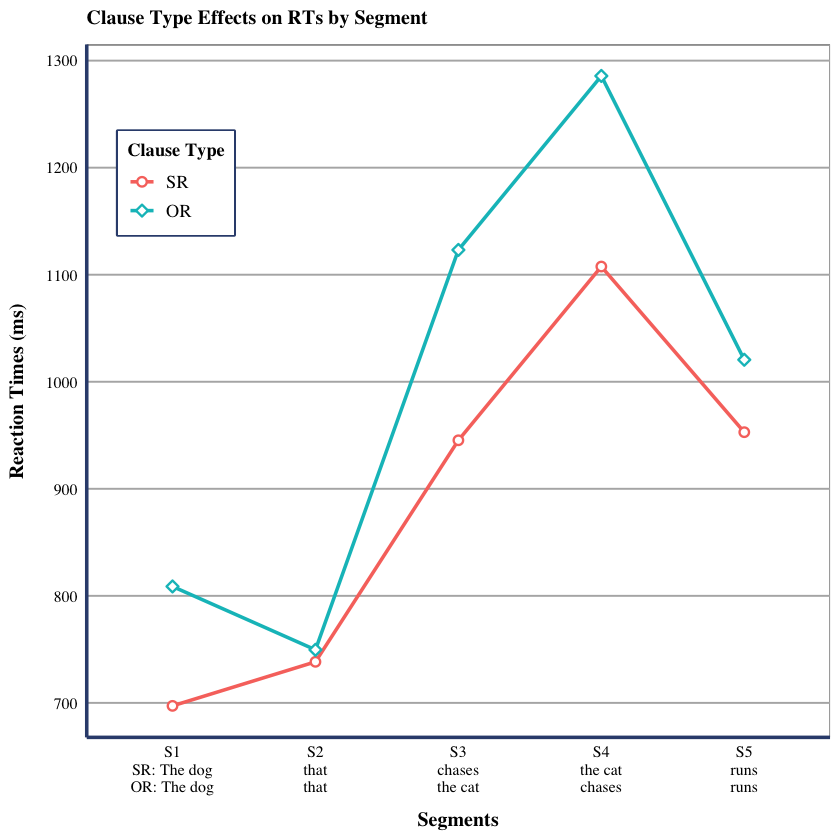

In [471]:
lm_clause_segment_plot <- df_merged %>%
    ggplot(aes(y = exp(rt), x = segment, color = clause_type, group = clause_type)) +
    stat_summary(fun = mean, geom = "line", linewidth = 1) +
    stat_summary(aes(shape = clause_type), fun = mean, geom = "point", size = 2, stroke = 1, fill = "white") +
    scale_shape_manual(
        values = c(21, 23)
    ) +
    labs(
        title = "Clause Type Effects on RTs by Segment",
        x = "Segments",
        y = "Reaction Times (ms)"
    ) +
    guides(color = guide_legend("Clause Type"), shape = guide_legend("Clause Type")) +
    theme(
        legend.position = c(0.12, 0.80),
        legend.box.background = element_rect(linewidth = 1, color = accent_color, linetype = "solid"),
        legend.text = element_text(size = 11),
        legend.title = element_text(size = 11)
    ) +
    scale_x_discrete(
        labels = c("S1\nSR: The dog\nOR: The dog", "S2\nthat\nthat", "S3\nchases\nthe cat", "S4\nthe cat\nchases", "S5\nruns\nruns")
    )
lm_clause_segment_plot

ggsave(filename = "lm_clause_segment_plot.svg", path = plots_path, height = 10, width = 15, units = "cm")


### 4. RQ2: Number Effects


#### Regression Model


In [461]:
lm_number <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ clause_type * number + (1 | part_eng_exp) + (1 | part_eng_pro))
summary(lm_number)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type * number + (1 | part_eng_exp) + (1 | part_eng_pro)
   Data: .

REML criterion at convergence: 187.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.54608 -0.69673 -0.01717  0.68291  2.29434 

Random effects:
 Groups       Name        Variance Std.Dev.
 part_eng_exp (Intercept) 0.05356  0.2314  
 part_eng_pro (Intercept) 0.00000  0.0000  
 Residual                 0.16041  0.4005  
Number of obs: 167, groups:  part_eng_exp, 2; part_eng_pro, 2

Fixed effects:
                        Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)              6.73568    0.18398   1.47615  36.610  0.00367 **
clause_typeOR            0.28469    0.12425 158.01805   2.291  0.02327 * 
numberPP                -0.06061    0.11945 158.00321  -0.507  0.61259   
numberSP                 0.03718    0.11810 158.00000   0.315  0.75330   
numberPS                 0.19432   

#### Table


In [462]:
lm_number_tidy <- lm_number %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ "> 0.05",
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR * SS (Intercept)",
            term == "clause_typeOR" ~ "OR",
            term == "numberPP" ~ "PP",
            term == "numberSP" ~ "SP",
            term == "numberPS" ~ "PS",
            term == "clause_typeOR:numberPP" ~ "OR * PP",
            term == "clause_typeOR:numberSP" ~ "OR * SP",
            term == "clause_typeOR:numberPS" ~ "OR * PS",
        ),
        code = case_when(
            p.value == "< 0.001" ~ "***",
            p.value == "< 0.01" ~ "**",
            p.value == "< 0.05" ~ "*",
            p.value == "> 0.05" ~ " "
        )
    )

lm_number_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR * SS (Intercept),6.73567667,0.1839841,36.6101119,1.47615,< 0.01,**
fixed,NA,OR,0.28469455,0.1242530,2.2912485,158.01805,< 0.05,*
fixed,NA,PP,-0.06060912,0.1194532,-0.5073879,158.00321,> 0.05,
fixed,NA,SP,0.03718285,0.1181035,0.3148328,158.00000,> 0.05,
fixed,NA,PS,0.19432354,0.1181035,1.6453664,158.00000,> 0.05,
fixed,NA,OR * PP,-0.10057628,0.1752957,-0.5737521,158.00013,> 0.05,
fixed,NA,OR * SP,-0.11029008,0.1773852,-0.6217549,158.06454,> 0.05,
fixed,NA,OR * PS,-0.22380849,0.1756269,-1.2743404,158.00468,> 0.05,


In [466]:
lm_number_table <- lm_number_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 565,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.padding = 10,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        column_labels.font.weight = "bold",
        heading.border.bottom.color = accent_color,
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**Mixed Model Results: Clause Type * Number**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Estimate",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

display_html(as_raw_html(lm_number_table))
gtsave(lm_number_table, filename = "number_table.png", path = tables_path)


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: Times; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 12px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: 565px; border-top-style: solid; border-top-width: 0px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" width="565" bgcolor="#FFFFFF">
 
 
 <td colspan="6" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 12px; padding-top: 10px; padding-bottom: 10px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #354C7C; font-weight: normal;" bgcolor="#FFFFFF" align="center"> Mixed Model Results: Clause Type * Number 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="term" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#354C7C" valign="bottom" align="left">Condition 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="estimate" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Estimate 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="std.error" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Std. Error 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="statistic" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right"> t -value 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="p.value" style="bor

file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//RtmpiIspwT/file2ee01acb2704.html screenshot completed



#### Plots


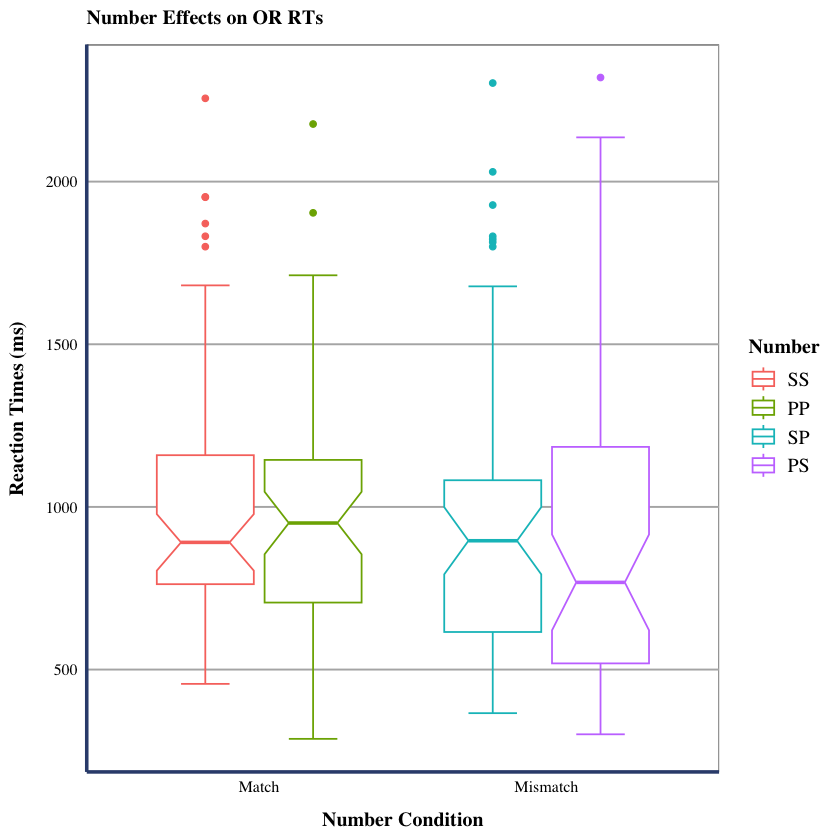

In [464]:
lm_number_plot <- df_merged %>%
    filter(clause_type == "OR") %>%
    ggplot(aes(y = exp(rt), x = matching, color = number)) +
    geom_boxplot(notch = TRUE, staplewidth = 0.5) +
    labs(
        title = "Number Effects on OR RTs",
        x = "Number Condition",
        y = "Reaction Times (ms)",
        color = "Number"
    )
lm_number_plot

ggsave(filename = "lm_number_plot.svg", path = plots_path, height = 6, width = 5)


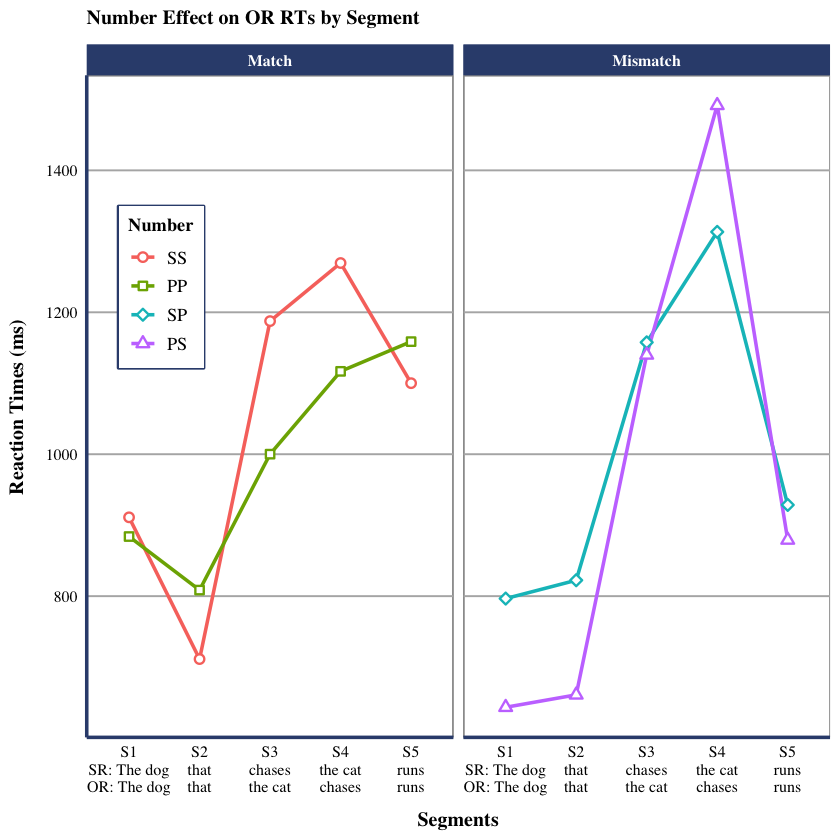

In [473]:
lm_number_plot2 <- df_merged %>%
    filter(clause_type == "OR") %>%
    ggplot(aes(y = exp(rt), x = segment, color = number, group = number)) +
    stat_summary(fun = mean, geom = "line", linewidth = 1) +
    stat_summary(aes(shape = number), fun = mean, geom = "point", size = 2, stroke = 1, fill = "white") +
    scale_shape_manual(
        values = c(21, 22, 23, 24)
    ) +
    labs(
        title = "Number Effect on OR RTs by Segment",
        x = "Segments",
        y = "Reaction Times (ms)"
    ) +
    guides(color = guide_legend("Number"), shape = guide_legend("Number")) +
    scale_x_discrete(
        labels = c("S1\nSR: The dog\nOR: The dog", "S2\nthat\nthat", "S3\nchases\nthe cat", "S4\nthe cat\nchases", "S5\nruns\nruns")
    ) +
    theme(
        legend.position = c(0.10, 0.68),
        legend.box.background = element_rect(linewidth = 1, color = accent_color, linetype = "solid"),
        legend.text = element_text(size = 11),
        legend.title = element_text(size = 11)
    ) +
    facet_wrap(~matching)
lm_number_plot2

ggsave(filename = "lm_number_segment_plot.svg", path = plots_path, height = 10, width = 15, units = "cm")
